Principal Component Analysis (PCA) is an unsupervised, linear dimensionality reduction technique that transforms complex, high-dimensional datasets into a smaller set of uncorrelated variables called principal components.

step1: find covariance matrix

step2: Eigen value # if you have two features you get 2 eigen values

step3: Using Eigen values find Eigen-Vectors

step4: dataset * Eigen-Vector = PCA1 > PCA2 > and so on ...

In [1]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

# Import necessary packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Preprocessing & PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans

# Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [11]:
# Load dataset
df = pd.read_csv("wine.csv")

In [10]:
df.sample(30)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
119,2,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.280000,0.93,3.05,564
124,2,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.800000,0.75,3.64,380
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
160,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.650000,0.56,1.58,520
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510
56,1,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.380000,0.94,3.31,970
21,1,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.500000,1.03,3.52,770
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630


In [6]:
df.shape

(178, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


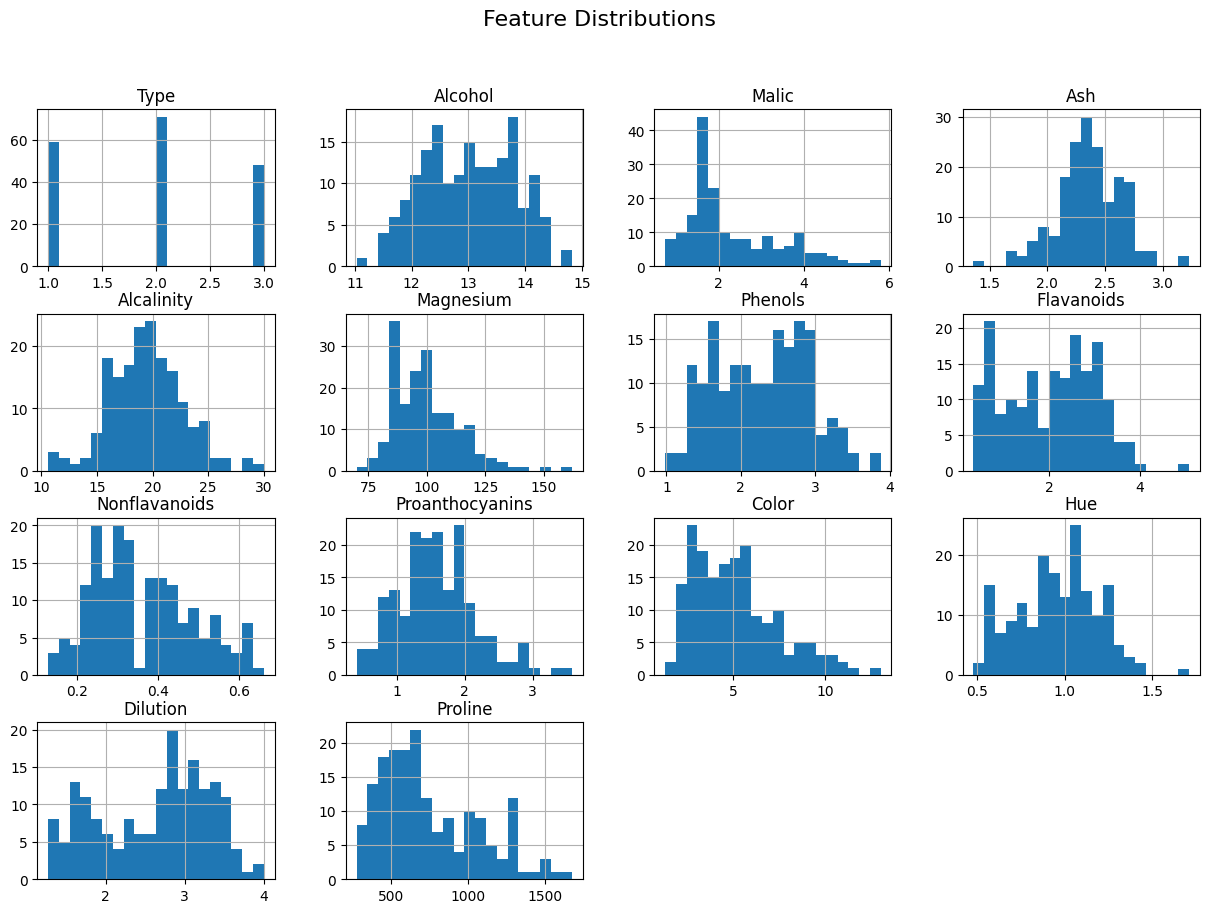

In [12]:
# Histograms
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

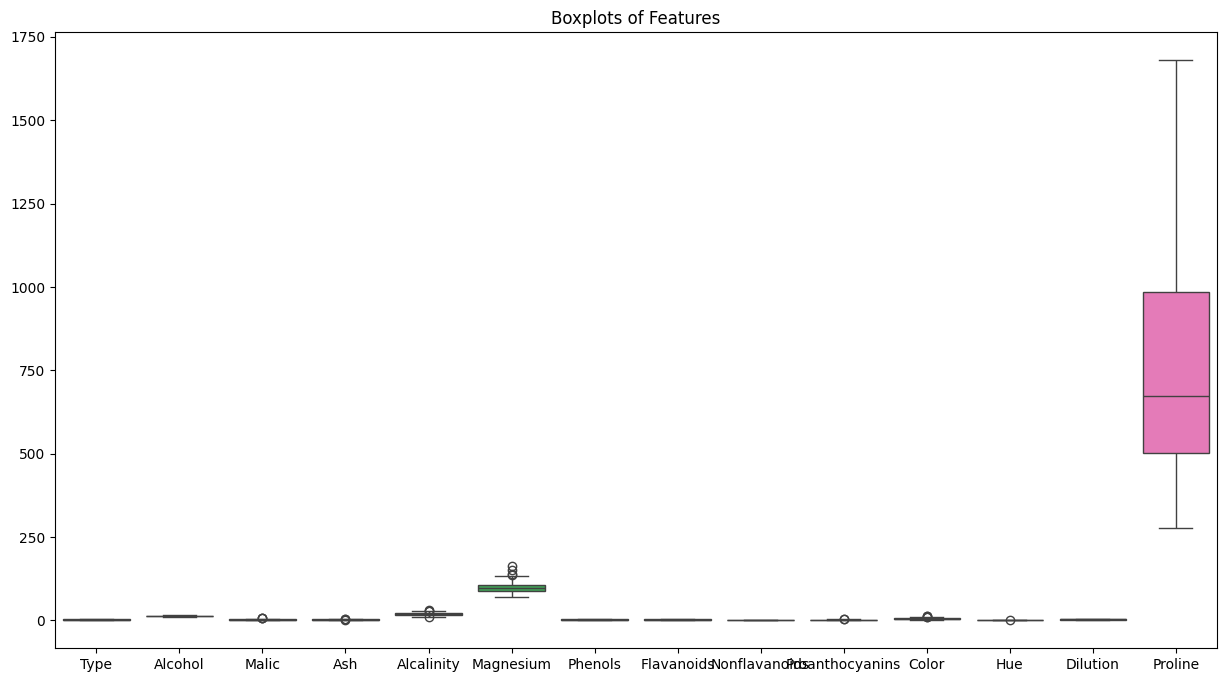

In [15]:
# Boxplot - Outliers detection
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.title("Boxplots of Features")
plt.show()

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

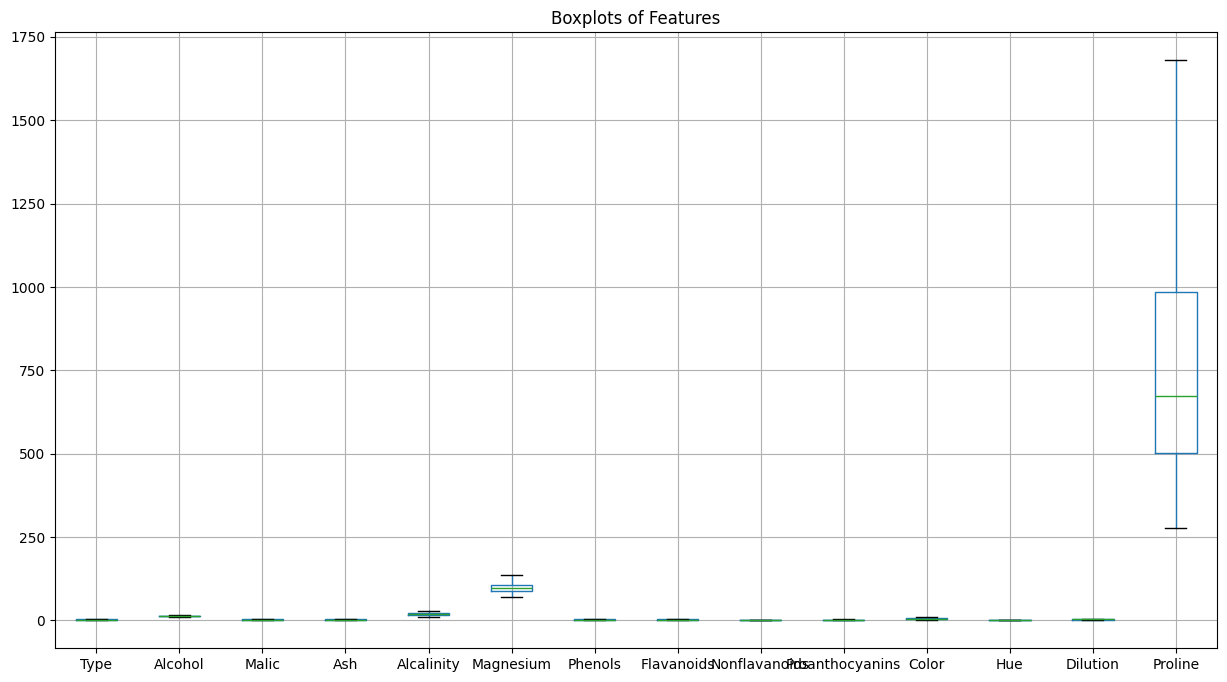

In [19]:
df.boxplot(figsize=(15,8))
plt.title("Boxplots of Features")
plt.show()

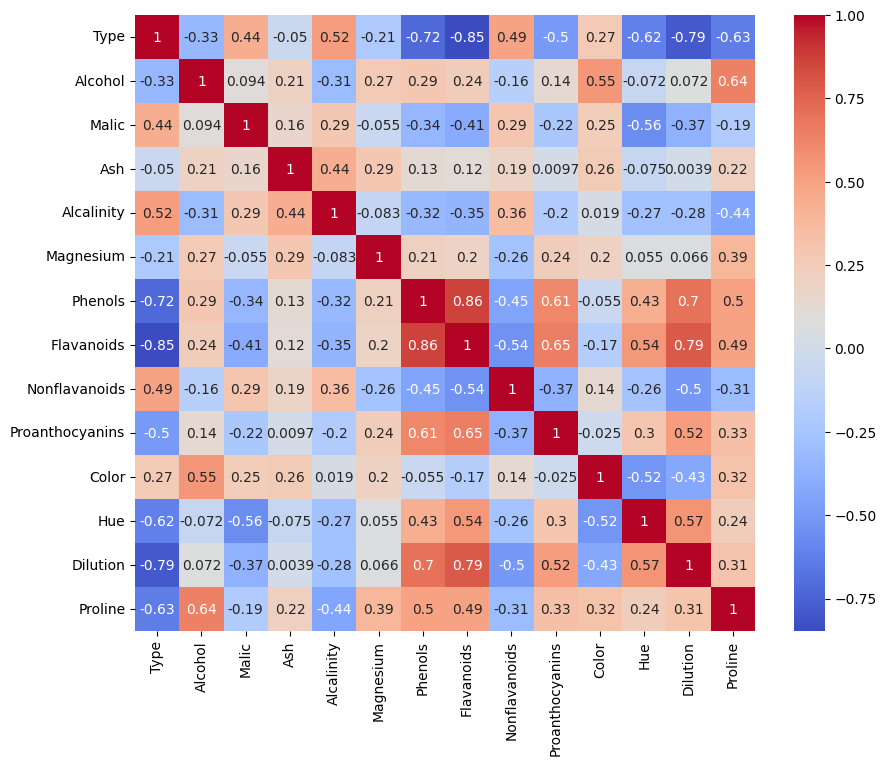

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [23]:
# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [22]:
scaled_data

array([[-1.21394365,  1.51861254, -0.56553422, ...,  0.36660959,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.50172839, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02694849, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.77705125, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.23659622, ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.61297912, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [24]:
# Covariance matrix of standardized data
cov_matrix = np.cov(scaled_data.T)
cov_matrix

array([[ 1.00564972, -0.3300763 ,  0.44290993, -0.0479489 ,  0.52857771,
        -0.22553135, -0.72322641, -0.85228566,  0.49187249, -0.51542323,
         0.26173003, -0.62506063, -0.79268286, -0.63729711],
       [-0.3300763 ,  1.00564972,  0.09529158,  0.2214182 , -0.31395502,
         0.30388006,  0.29073446,  0.23815287, -0.15681042,  0.15403617,
         0.55220976, -0.06753548,  0.07275191,  0.64735687],
       [ 0.44290993,  0.09529158,  1.00564972,  0.16755524,  0.29755329,
        -0.03955084, -0.34096566, -0.41721865,  0.29586545, -0.2358999 ,
         0.26639339, -0.56960856, -0.37468661, -0.19225258],
       [-0.0479489 ,  0.2214182 ,  0.16755524,  1.00564972,  0.43012909,
         0.32433258,  0.12513898,  0.09811293,  0.18470352,  0.00611461,
         0.25825004, -0.07633311, -0.01127709,  0.23097325],
       [ 0.52857771, -0.31395502,  0.29755329,  0.43012909,  1.00564972,
        -0.09858424, -0.33492783, -0.36545785,  0.37136184, -0.20997347,
         0.00980346, -0.28

In [27]:
# Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [28]:
eigen_values

array([5.60458768, 2.56375389, 1.42651378, 0.93195358, 0.84238847,
       0.66542266, 0.528459  , 0.05699541, 0.13456214, 0.3596558 ,
       0.17366731, 0.29687634, 0.26475628, 0.2295037 ])

In [29]:
eigen_vectors

array([[ 0.39251008,  0.00496269, -0.00556301, -0.10939511,  0.15361959,
        -0.21739957, -0.04409867,  0.66431314, -0.49647966, -0.05192726,
        -0.04619357, -0.1555718 , -0.21033925, -0.0052211 ],
       [-0.1377818 ,  0.47689882, -0.2019702 ,  0.04501331, -0.26742089,
         0.14074785, -0.14540143,  0.09244739, -0.01635067, -0.38030219,
        -0.23655023, -0.50512106,  0.28157254, -0.23338822],
       [ 0.22329763,  0.22541809,  0.08624025, -0.47958192, -0.12432757,
         0.6199064 ,  0.35608698, -0.02332232,  0.04622811, -0.0954    ,
         0.09693893,  0.01125568, -0.32786281,  0.08092856],
       [-0.0009843 ,  0.31850888,  0.62967078,  0.23727958, -0.08938002,
         0.1024996 , -0.17992039,  0.0099369 , -0.15076789,  0.12689988,
        -0.01781974,  0.29092581, -0.11058932, -0.50870354],
       [ 0.22883621, -0.01538238,  0.60797016, -0.09015793,  0.05741038,
        -0.11152861, -0.27856523, -0.10117953,  0.18511242, -0.3710201 ,
        -0.0673936 , -0.17

In [30]:
# Sort eigenvalues and eigenvectors
idx = np.argsort(eigen_values)[::-1]

eigen_values_sorted = eigen_values[idx]
eigen_vectors_sorted = eigen_vectors[:, idx]

eigen_values_sorted

array([5.60458768, 2.56375389, 1.42651378, 0.93195358, 0.84238847,
       0.66542266, 0.528459  , 0.3596558 , 0.29687634, 0.26475628,
       0.2295037 , 0.17366731, 0.13456214, 0.05699541])

In [31]:
# Project data onto first 2 principal components
pca_manual = scaled_data @ eigen_vectors_sorted[:, :2]

pca_manual[:5]

array([[-3.56196816,  1.52896694],
       [-2.54433006, -0.32999258],
       [-2.80654586,  1.04222492],
       [-3.94428663,  2.79326448],
       [-1.41586551,  0.95343036]])

In [33]:
# Vertify "PCA Using sklearn"
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_data[:5]

array([[-3.56196816,  1.52896694],
       [-2.54433006, -0.32999258],
       [-2.80654586,  1.04222492],
       [-3.94428663,  2.79326448],
       [-1.41586551,  0.95343036]])

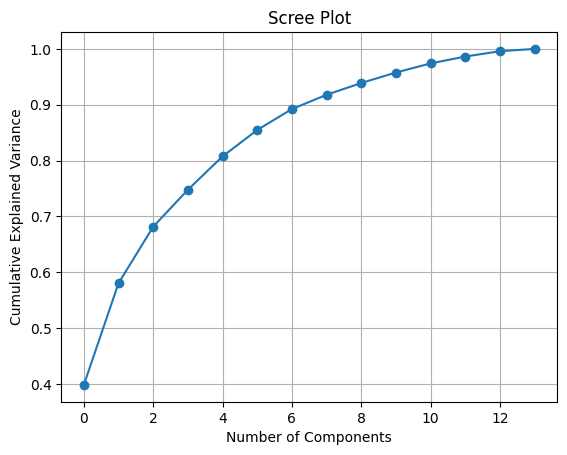

In [34]:
pca_full = PCA()
pca_full.fit(scaled_data)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.show()

In [36]:
# PCA DataFrame
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_df.head()

,PC1,PC2
0,-3.561968,1.528967
1,-2.544330,-0.329993
2,-2.806546,1.042225
3,-3.944287,2.793264
4,-1.415866,0.953430


Clustering using K-Mean

In [38]:
scaled_data.shape

(178, 14)

In [39]:
# Elbow Method to Find Optimal K
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


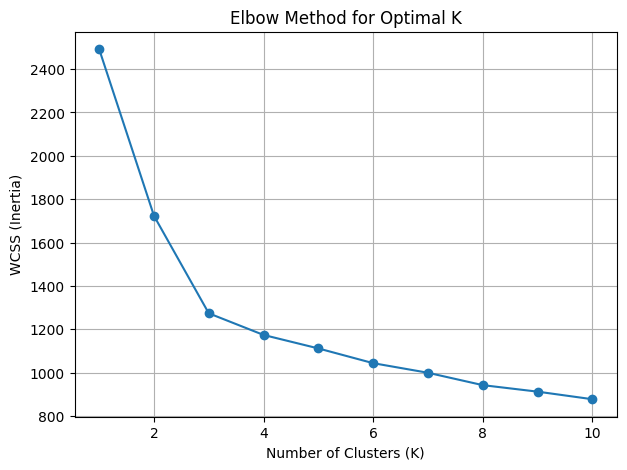

In [40]:
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()

The optimal value of K is chosen at the elbow point where WCSS reduction slows down.
(For wine dataset → K ≈ 3)

In [41]:
k_optimal = 3

kmeans_original = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters_original = kmeans_original.fit_predict(scaled_data)

clusters_original

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

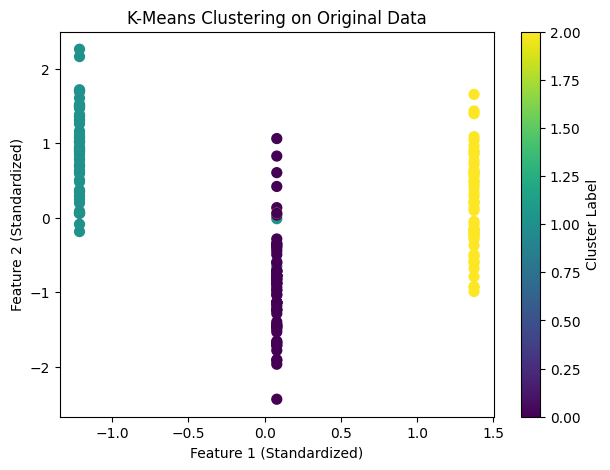

In [42]:
plt.figure(figsize=(7,5))
plt.scatter(
    scaled_data[:, 0],
    scaled_data[:, 1],
    c=clusters_original,
    cmap='viridis',
    s=50
)

plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("K-Means Clustering on Original Data")
plt.colorbar(label="Cluster Label")
plt.show()

In [46]:
# Silhouette Score
# Import "from sklearn.metrics import silhouette_score"
silhouette_orig = silhouette_score(scaled_data, clusters_original)
silhouette_orig

np.float64(0.308133619770163)

In [45]:
# Davies–Bouldin index.
# Import "from sklearn.metrics import davies_bouldin_score"
db_orig = davies_bouldin_score(scaled_data, clusters_original)
db_orig

np.float64(1.3102600912527067)

In [47]:
print(f"Silhouette Score (Original Data): {silhouette_orig:.4f}")
print(f"Davies–Bouldin Index (Original Data): {db_orig:.4f}")

Silhouette Score (Original Data): 0.3081
Davies–Bouldin Index (Original Data): 1.3103


Clustering on PCA-Transformed Data

In [48]:
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(pca_data)

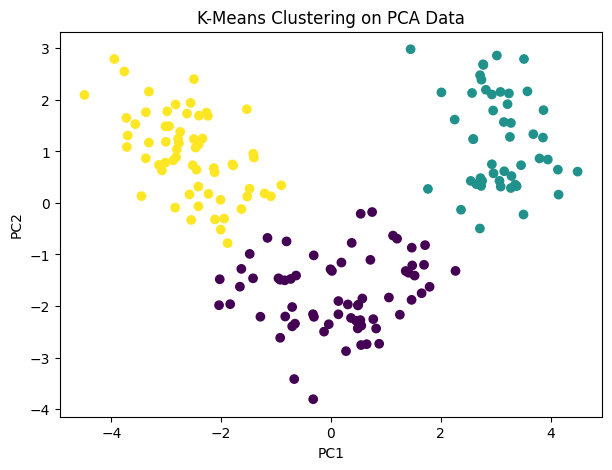

In [49]:
plt.figure(figsize=(7,5))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=clusters_pca, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering on PCA Data")
plt.show()

In [50]:
silhouette_pca = silhouette_score(pca_data, clusters_pca)
db_pca = davies_bouldin_score(pca_data, clusters_pca)

silhouette_pca, db_pca

(np.float64(0.6014836679611884), np.float64(0.5415533274487031))

In [52]:
## Comparison & Analysis results of Original and PCA Data
comparison = pd.DataFrame({
    "Method": ["Original Data", "PCA Data"],
    "Silhouette Score": [silhouette_orig, silhouette_pca],
    "Davies-Bouldin Index": [db_orig, db_pca]
})

comparison

,Method,Silhouette Score,Davies-Bouldin Index
0,Original Data,0.308134,1.310260
1,PCA Data,0.601484,0.541553


**Observation**

PCA reduces noise and redundancy

PCA clustering often has:

*   Higher silhouette score
*   Higher silhouette score
*   Lower Davies–Bouldin index
*   Visualization is much clearer in PCA space
*   Minor loss of information but better structure

**Key Findings**

*   PCA captures maximum variance with fewer dimensions
*   Clustering performance improves after PCA
*   Visualization becomes interpretable
*   Computational cost reduces

**Practical Implications**

Use PCA before clustering for:

*   High-dimensional data
*   Correlated features

